# Clothes Classification with Support Vector Machines

Support Vector Machines (SVM) is used for image classification. A new version of the famous MNIST dataset is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.

In [12]:
%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [6]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [7]:
X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


In [8]:
np.random.seed(348653)

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [39 47 47 57 51 53 51 58 47 50]


In [9]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


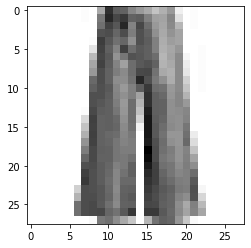

LABEL: 1
INPUT:


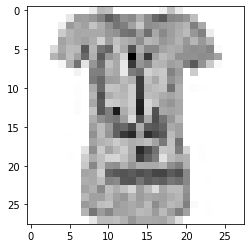

LABEL: 0
INPUT:


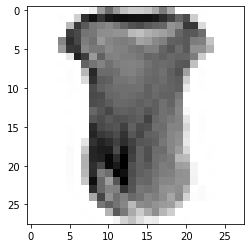

LABEL: 0
INPUT:


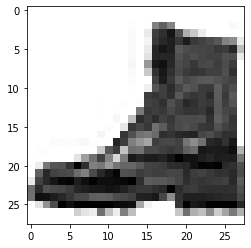

LABEL: 9


In [10]:
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

In [13]:
# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)

means = clf.cv_results_['mean_test_score']
standards = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, standards, clf.cv_results_['params']):
    print("\nAll scores on the grid:", "%0.3f (+/-%0.03f) for %r"
         % (mean, std * 2, params))

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 50}
Score with best parameters: 0.772

All scores on the grid: 0.158 (+/-0.110) for {'C': 0.0005}

All scores on the grid: 0.158 (+/-0.110) for {'C': 0.005}

All scores on the grid: 0.158 (+/-0.110) for {'C': 0.05}

All scores on the grid: 0.564 (+/-0.065) for {'C': 0.5}

All scores on the grid: 0.756 (+/-0.057) for {'C': 5}

All scores on the grid: 0.772 (+/-0.048) for {'C': 50}

All scores on the grid: 0.768 (+/-0.053) for {'C': 500}


In [14]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

svc = SVC(degree=2)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)

means = clf.cv_results_['mean_test_score']
standards = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, standards, clf.cv_results_['params']):
    print("\nAll scores on the grid:", "%0.3f (+/-%0.03f) for %r"
         % (mean, std * 2, params))

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.05}
Score with best parameters: 0.756

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.05, 'gamma': 0.05}

All scores on the grid: 0.118 (+/-0.015) for {'C': 0.05, 'gamma': 0.5}

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.05, 'gamma': 5.0}

All scores on the grid: 0.678 (+/-0.092) for {'C': 0.5, 'gamma': 0.05}

All scores on the grid: 0.118 (+/-0.015) for {'C': 0.5, 'gamma': 0.5}

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.5, 'gamma': 5.0}

All scores on the grid: 0.756 (+/-0.047) for {'C': 5, 'gamma': 0.05}

All scores on the grid: 0.124 (+/-0.027) for {'C': 5, 'gamma': 0.5}

All scores on the grid: 0.112 (+/-0.008) for {'C': 5, 'gamma': 5.0}


In [15]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

degree = 3
svc = SVC(degree = 3)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)

means = clf.cv_results_['mean_test_score']
standards = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, standards, clf.cv_results_['params']):
    print("\nAll scores on the grid:", "%0.3f (+/-%0.03f) for %r"
         % (mean, std * 2, params))

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.05}
Score with best parameters: 0.756

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.05, 'gamma': 0.05}

All scores on the grid: 0.118 (+/-0.015) for {'C': 0.05, 'gamma': 0.5}

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.05, 'gamma': 5.0}

All scores on the grid: 0.678 (+/-0.092) for {'C': 0.5, 'gamma': 0.05}

All scores on the grid: 0.118 (+/-0.015) for {'C': 0.5, 'gamma': 0.5}

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.5, 'gamma': 5.0}

All scores on the grid: 0.756 (+/-0.047) for {'C': 5, 'gamma': 0.05}

All scores on the grid: 0.124 (+/-0.027) for {'C': 5, 'gamma': 0.5}

All scores on the grid: 0.112 (+/-0.008) for {'C': 5, 'gamma': 5.0}


In [16]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
 
print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)

means = clf.cv_results_['mean_test_score']
standards = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, standards, clf.cv_results_['params']):
    print("\nAll scores on the grid:", "%0.3f (+/-%0.03f) for %r"
         % (mean, std * 2, params))

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.784

All scores on the grid: 0.712 (+/-0.078) for {'C': 0.5, 'gamma': 0.005}

All scores on the grid: 0.678 (+/-0.092) for {'C': 0.5, 'gamma': 0.05}

All scores on the grid: 0.118 (+/-0.015) for {'C': 0.5, 'gamma': 0.5}

All scores on the grid: 0.160 (+/-0.115) for {'C': 0.5, 'gamma': 5}

All scores on the grid: 0.784 (+/-0.035) for {'C': 5, 'gamma': 0.005}

All scores on the grid: 0.756 (+/-0.047) for {'C': 5, 'gamma': 0.05}

All scores on the grid: 0.124 (+/-0.027) for {'C': 5, 'gamma': 0.5}

All scores on the grid: 0.112 (+/-0.008) for {'C': 5, 'gamma': 5}

All scores on the grid: 0.768 (+/-0.045) for {'C': 50, 'gamma': 0.005}

All scores on the grid: 0.756 (+/-0.047) for {'C': 50, 'gamma': 0.05}

All scores on the grid: 0.124 (+/-0.027) for {'C': 50, 'gamma': 0.5}

All scores on the grid: 0.112 (+/-0.008) for {'C': 50, 'gamma': 5}

All scores on the grid: 0.768 (+/-0.045) for {'

Observation: Polynomial kernels is less time consuming and provides less accuracy than the Radial Basis Function. Rbf is doing this with using lower gamma. Most of grid scores of the rbf is higher than polynomial kernels.

In [17]:
# training and test error for the best SVM model from CV
parameters = {'C': [5],'gamma':[0.005]}

svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters)
best_SVM = clf.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.070000
Best SVM test error: 0.212908
